# SPOTIFY DATA PROJECT: Predicting Track Popularity with Music Analytics

This project is an innovative data science project aimed at predicting the popularity of music tracks using advanced machine learning techniques and in-depth music analytics. Leveraging a comprehensive dataset of Spotify tracks spanning diverse genres, this project explores the intricate relationships between audio characteristics and track popularity.

**Exploratory Data Analysis (EDA):**
- Overview of the dataset through summary statistics and visualizations.
- In-depth exploration of numerical features, genre distribution, and top artists.

**Correlation Analysis:**
- Uncover correlations between different audio characteristics, providing insights into how certain features influence popularity.

**Genre-specific Insights:**
- Analyze genre distributions and identify patterns specific to each music genre.

**Top Artists and Tracks Visualization:**
- Visual representation of the top artists and tracks based on popularity, offering insights into user preferences.

**Explicit vs. Non-Explicit Comparison:**
- Comparative analysis of explicit and non-explicit songs, exploring characteristic differences.

**Key and Mode Distribution:**
- Examination of musical key and mode distributions to identify prevalent patterns.

**Time Signature Analysis:**
- Investigation into the distribution of time signatures in the dataset.

**Duration Analysis:**
- Exploration of song duration distributions and potential correlations with other features.

**Machine Learning Model for Popularity Prediction:**
- Implementation of a linear regression model to predict track popularity.
- Evaluation using Mean Squared Error (MSE) and R-squared metrics.

# DATA ANALYTICS

Analyze the music genre:

1. Duration times
2. How does a genre typically "sound"?
3. Do characteristics of popular songs vary across genres?


In [64]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
# ML Model Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

**About Dataset**

This is a dataset of Spotify tracks over a range of 125 different genres. Each track has some audio features associated with it. The data is in CSV format which is tabular and can be loaded quickly.

In [65]:
# Load dataset
df = pd.read_csv("dataset.csv")

## Exploratory Data Analysis (EDA):

- **Get an overview of the dataset by examining summary statistics for each numerical column (e.g., popularity, duration_ms, danceability, energy, etc.).**

In [66]:
# Get an overview of the dataset
numerical_summary = df.describe()
print("Summary Statistics for Numerical Columns:")
print(numerical_summary)

Summary Statistics for Numerical Columns:
          Unnamed: 0     popularity  ...          tempo  time_signature
count  114000.000000  114000.000000  ...  114000.000000   114000.000000
mean    56999.500000      33.238535  ...     122.147837        3.904035
std     32909.109681      22.305078  ...      29.978197        0.432621
min         0.000000       0.000000  ...       0.000000        0.000000
25%     28499.750000      17.000000  ...      99.218750        4.000000
50%     56999.500000      35.000000  ...     122.017000        4.000000
75%     85499.250000      50.000000  ...     140.071000        4.000000
max    113999.000000     100.000000  ...     243.372000        5.000000

[8 rows x 15 columns]


- **Visualize distributions of numerical features using histograms.**

<Figure size 1200x800 with 0 Axes>

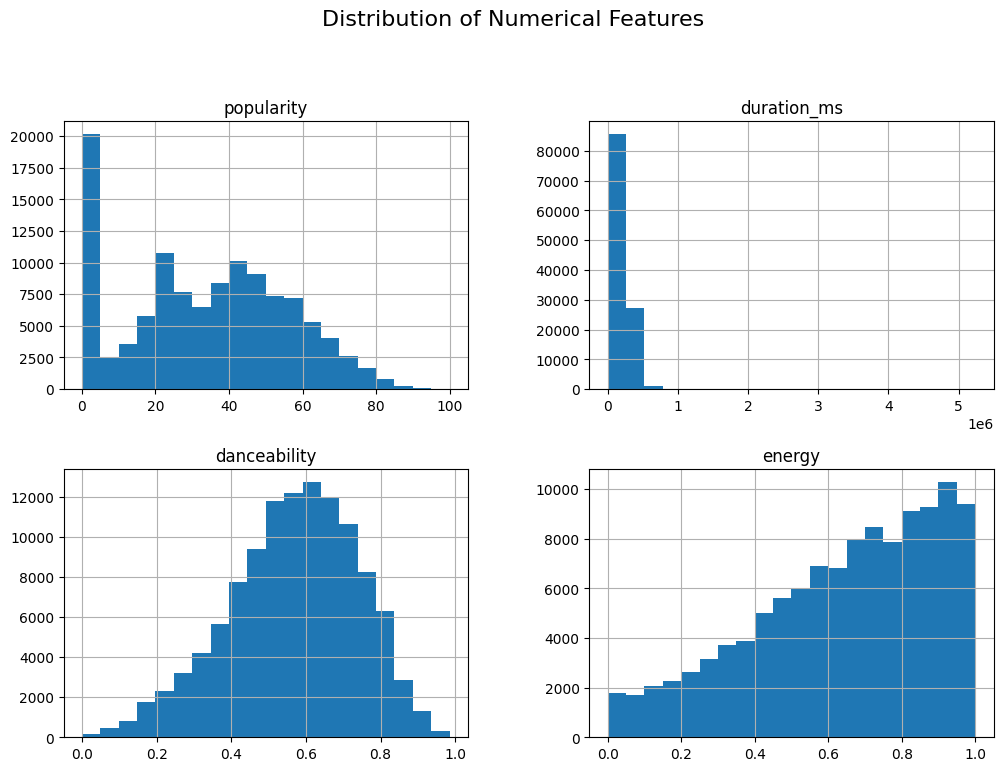

In [67]:
# Visualize distributions of numerical features
plt.figure(figsize=(12, 8))
numerical_columns = ['popularity', 'duration_ms', 'danceability', 'energy']
df[numerical_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features', y=1.02, fontsize=16)
plt.show()

- **Check for missing values and handle them appropriately.**

In [68]:
# Check for missing values and handle them
missing_values = df.isnull().sum()
df_cleaned = df.dropna()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


## Correlation Analysis:

- **Explore the correlation between different numerical features. For example, see if there is a correlation between popularity and energy, or between loudness and speechiness.**

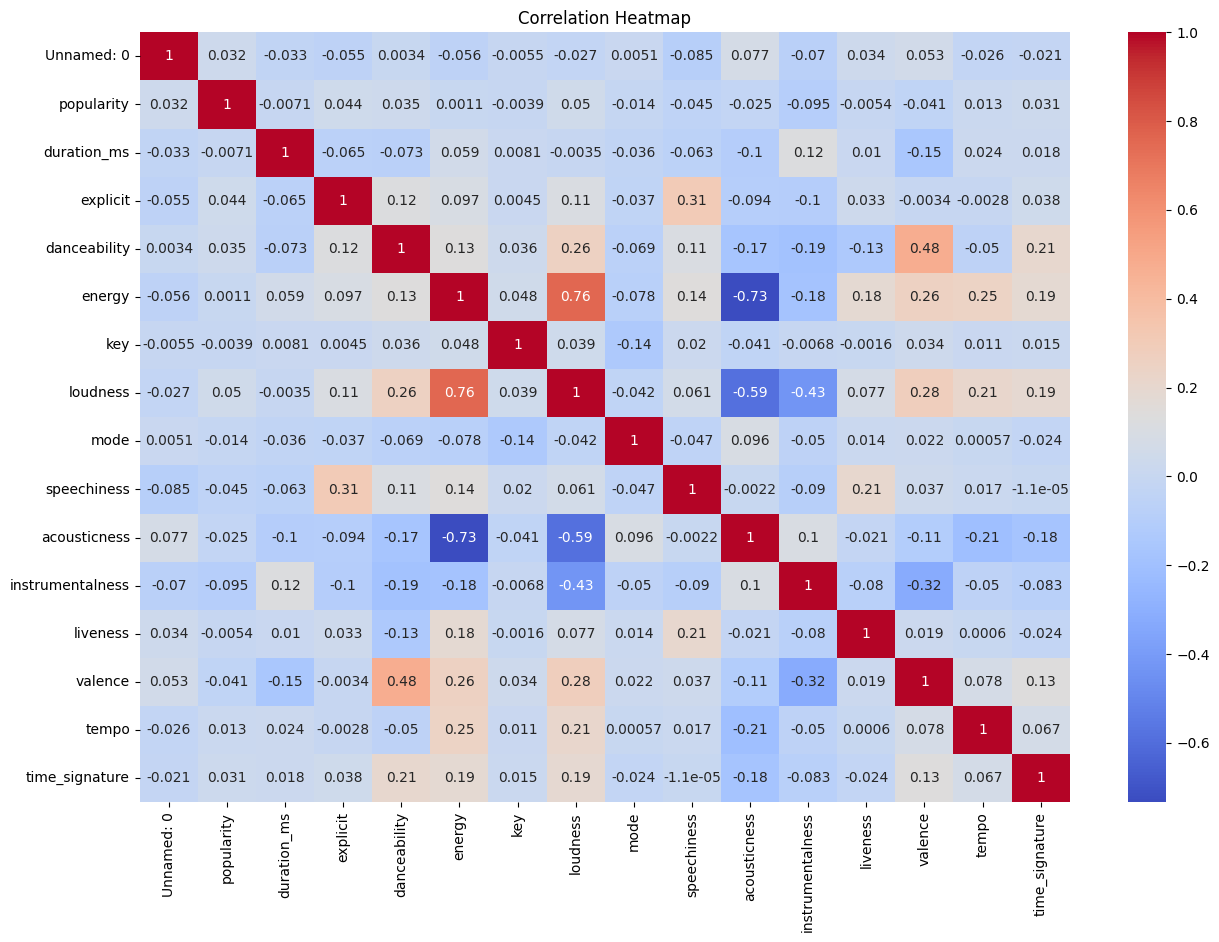

In [69]:
# Correlation Analysis - Explore correlation between numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Heatmap Insights:**

**Strong positive correlations:**
1.   danceability and energy: These features have the strongest positive correlation, suggesting that music that is high in danceability is also likely to be high in energy, and vice versa.
2.   loudness and energy: These features also have a strong positive correlation, indicating that louder music tends to be higher in energy as well.
3.    speechiness and acousticness: This suggests that music with more spoken vocals tends to be more acoustic.ic Classification: Features like danceability, energy, & acousticness are key for classifying genres & detecting mood.

**Additional Notes:**
- Colormap: Blue = negative correlation, red = positive.
- Cell values: Correlation coefficients between features.

## Genre Distribution:

**Analyze the distribution of genres in the dataset. Check which genres are most prevalent and which ones are less common.**

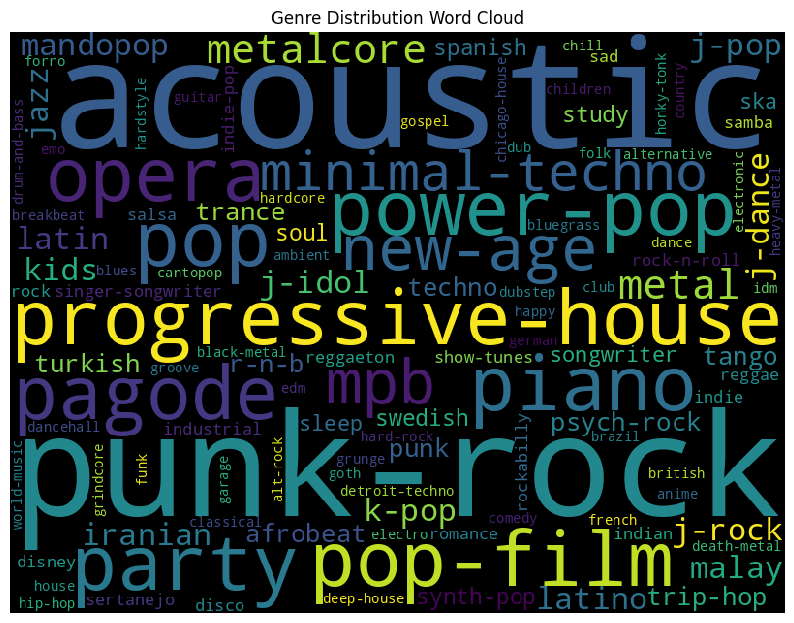

In [70]:
# Genre Distribution - Visualize the distribution of genres using a word cloud
genre_distribution = df['track_genre'].value_counts()
wordcloud = WordCloud(width=800, height=600).fit_words(dict(genre_distribution))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='nearest')
plt.axis('off')
plt.title('Genre Distribution Word Cloud')
plt.show()

## Top Artists and Tracks:

- Identify the top artists and tracks based on popularity. 
- Visualize this information to gain insights into user preferences.

In [71]:
# Top Artists and Tracks - Visualize top artists based on popularity
top_artists = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
fig = px.bar(top_artists, x=top_artists.index, y='popularity', title='Top 10 Artists by Popularity', barmode='group')
fig.update_layout(xaxis_title='Artist', yaxis_title='Average Popularity Score')
fig.show()

## Explicit vs. Non-Explicit Songs:

- **Compare the characteristics (e.g., danceability, energy, etc.) of explicit and non-explicit songs.**

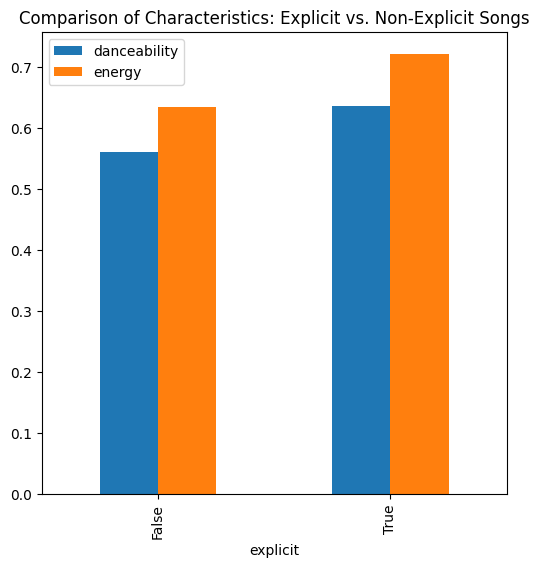

In [72]:
# Explicit vs. Non-Explicit Songs - Compare characteristics of explicit and non-explicit songs
explicit_vs_nonexplicit = df.groupby('explicit')[['danceability', 'energy']].mean()
explicit_vs_nonexplicit.plot(kind='bar', figsize=(6, 6))
plt.title('Comparison of Characteristics: Explicit vs. Non-Explicit Songs')
plt.show()

## Key and Mode Distribution:

- **Analyze the distribution of musical keys (key) and modes (mode) in the dataset. Determine if certain keys or modes are more common.**

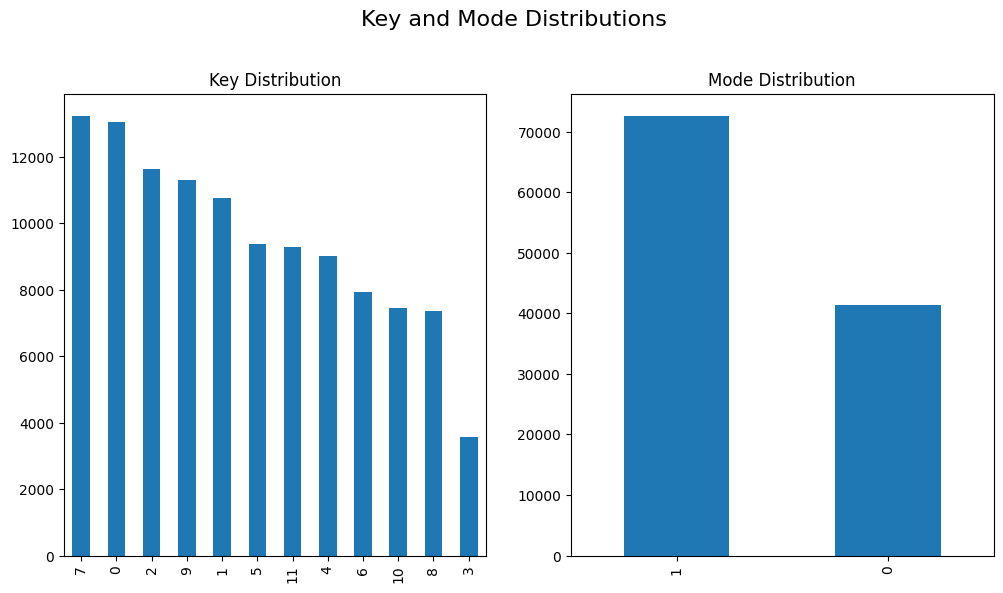

In [73]:
# Key and Mode Distribution - Analyze distribution of musical keys and modes
key_distribution = df['key'].value_counts()
mode_distribution = df['mode'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
key_distribution.plot(kind='bar', title='Key Distribution')

plt.subplot(1, 2, 2)
mode_distribution.plot(kind='bar', title='Mode Distribution')

plt.suptitle('Key and Mode Distributions', y=1.02, fontsize=16)
plt.show()

## Time Signature Analysis:

- **Investigate the distribution of time signatures (time_signature) in the dataset.**

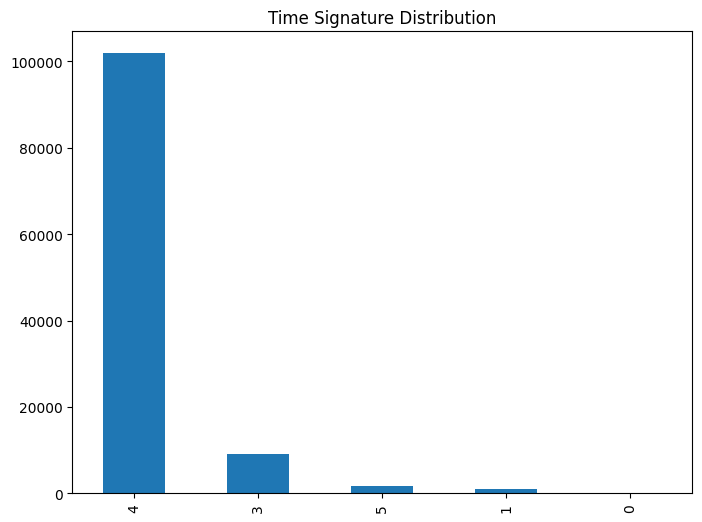

In [74]:
# Time Signature Analysis - Investigate the distribution of time signatures
time_signature_distribution = df['time_signature'].value_counts()
time_signature_distribution.plot(kind='bar', figsize=(8, 6), title='Time Signature Distribution')
plt.show()

## Duration Analysis:

- **Explore the distribution of song durations (duration_ms). Check if there are any correlations between duration and other features.**

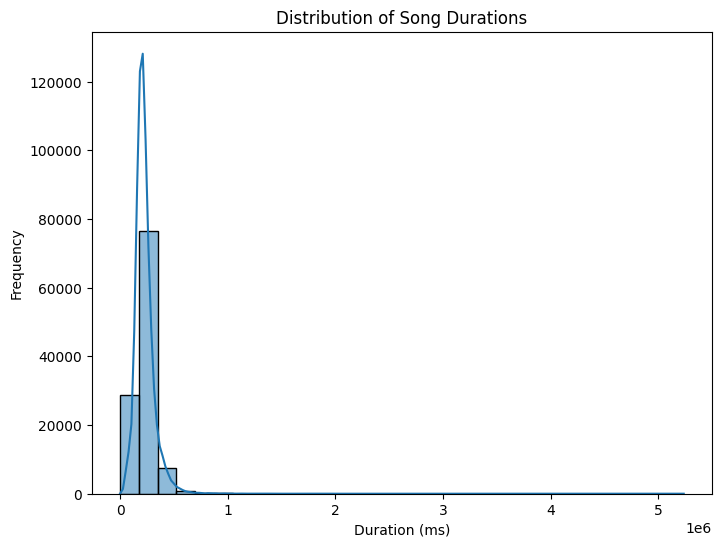

In [75]:
# Duration Analysis - Explore distribution of song durations
plt.figure(figsize=(8, 6))
sns.histplot(df['duration_ms'], bins=30, kde=True)
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# DATA SCIENCE
**Predict the popularity of a track**
- which features are important?
- correlation of audio characteristics?
- which model is best suited for this?

##  Linear Regression Model

It covers the initial steps for predicting the popularity of a track, identifying important features, and exploring the correlation of audio characteristics

In [76]:
# Feature selection
X = df_cleaned[['duration_ms', 'danceability', 'energy']]  # Adjust features as needed
y = df_cleaned['popularity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

**Predicting the popularity of a track:**

In [77]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [78]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared error: {mse}')
print(f'R-Squared: {r2}')

Mean Squared error: 495.50733184402856
R-Squared: 0.001173460996294784


Here, mse is the Mean Squared Error, which measures the average squared difference between the actual and predicted values. The lower the MSE, the better the model performance.

r2 is the R-squared value, which represents the proportion of the variance in the dependent variable (popularity) that is predictable from the independent variables (features). A higher R-squared value indicates a better fit of the model to the data.

**Identifying important features:**

The coefficients of the linear regression model represent the importance of each feature in predicting the target variable (popularity). The code prints the coefficients, allowing to identify which features have a stronger impact on predicting popularity.

In [79]:
# Get coefficients to understand feature importance
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficients': model.coef_})
print(coefficients)

        Feature  Coefficients
0   duration_ms     -0.000001
1  danceability      4.515120
2        energy     -0.403205


**Exploring the correlation of audio characteristics:**

The coefficients indicate the strength and direction of the relationship between each feature and the target variable. A positive coefficient implies a positive correlation, while a negative coefficient implies a negative correlation.

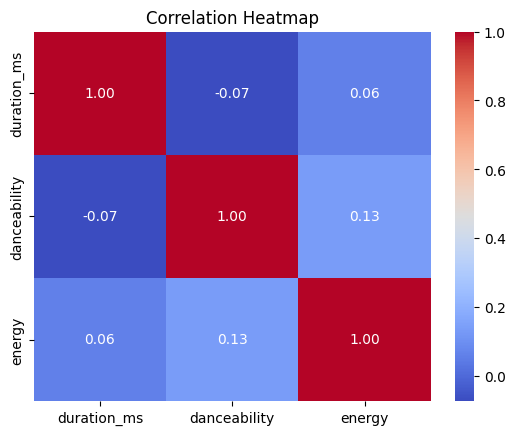

In [80]:
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Random Forest Regressor

Here's a more comprehensive model that includes steps for feature selection, data preprocessing, and evaluation using scikit-learn

In [81]:
# Feature selection
features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'valence', 'tempo']
target = 'popularity'

# Filter relevant features and target
df = df[features + [target]].dropna()

In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

In [83]:
# Model selection and training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_pred = model.predict(X_test)

In [85]:
# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 236.98433242815975
R-squared: 0.5210741907279957


In [86]:
# Feature importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("Feature Importance: ")
feature_importance

Feature Importance: 


acousticness        0.122738
duration_ms         0.117925
danceability        0.116818
tempo               0.116195
valence             0.114108
speechiness         0.113112
loudness            0.112095
energy              0.105220
instrumentalness    0.081788
dtype: float64

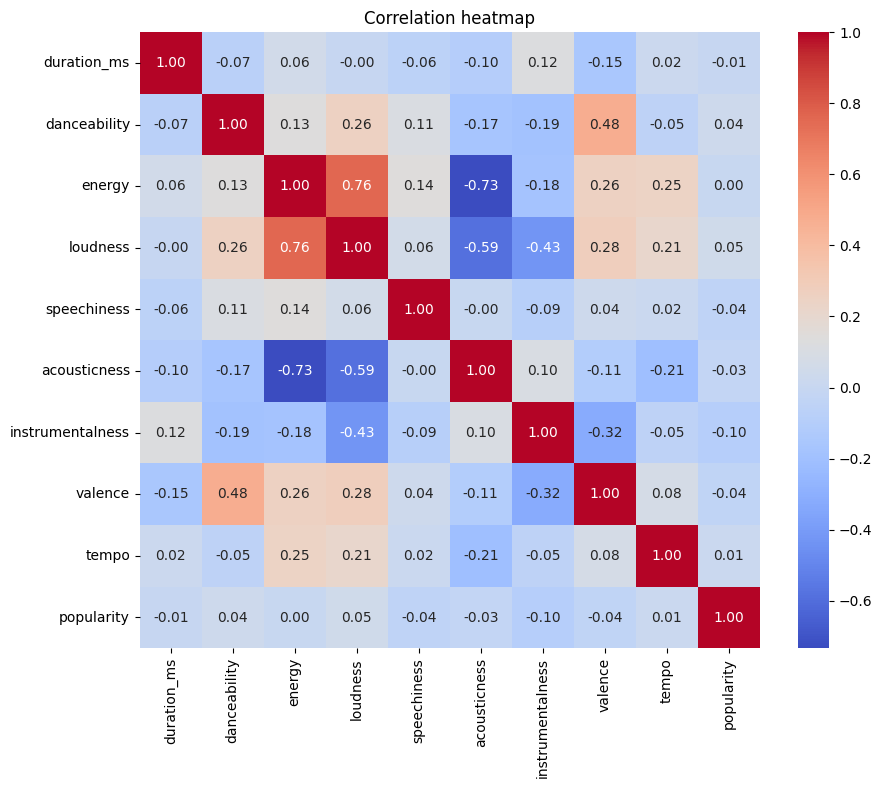

In [87]:
# Correlation heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation heatmap")
plt.show()
